<a href="https://colab.research.google.com/github/xanjoma/TD-informatique/blob/main/exam_fall25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mines Nancy - Fall 2025 - Numerical Optimization
----
## Exam: unconstrained and constrained optimization algorithms

The objective of this exam is to demonstrate your ability to implement several optimization algorithms, display results and comment your work.

### Running the Notebook
This notebook can be executed in the following environments:
- **Google Colab**: A convenient, cloud-based option that requires no setup. Simply open the notebook in Colab, and you're ready to run the code.
- **Locally**: You can run the notebook on your local machine using environments like **JupyterLab** or **Jupyter Notebook**. You can also run it directly in **Visual Studio Code** if you have the Jupyter extension. In all cases, ensure you have Python installed along with the required libraries, `NumPy` and `Matplotlib`, ``scipy``.


### Instructions: read carefully before starting.
- **duration**: 1 hour 45 min
- **modalities of grading**: code quality, comments, and results.
- **deliverable**: this .ipynb file, completed with your answers. To be uploaded on Arche [link](https://arche.univ-lorraine.fr/course/view.php?id=74098) at the end of the session.
- **make sure your code can be executed in a linear way**. In particular, check the code is **free from errors when you run execute all**.
- **documents**: you have access to all code developed during the course, lecture slides on Arche, and the course website. You can access the documentation of Python packages on the internet if you need to.
- The exam is probably too long. Each exercise is independent. Focus on what you know to do, and do your best.


> ### use of AI tools (Github Copilot, ChatGPT, Gemini, etc) is prohibited (and will be detected). Failure to do so is a fraud, and will result in a strong penalty.

Good luck!

In [51]:
# all imports for the exam
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

# Exercise 1: first and second-order algorithms

Consider the following unconstrained optimization problem
$$ \begin{array}{ll}
\operatorname{minimize}&\quad f_0(x):= \log(e^{x_1} + e^{x_2}) + \frac{1}{2}(x_1^2 + x_2^2)\\
\operatorname{subject\: to}&\quad x \in \mathbb{R}^2
\end{array}$$

This problem is convex and a minimum exists. We will study algorithms to solve this problem.

Recall from the theoretical part of the exam

$$
\begin{align*}
\nabla f_0(x) &= \begin{bmatrix}
            \dfrac{e^{x_1}}{e^{x_1} +e^{x_2}} + x_1\\
             \dfrac{e^{x_2}}{e^{x_1} +e^{x_2}} + x_2
        \end{bmatrix}\\
\nabla^2 f_0(x) &= \frac{1}{(e^{x_1}+e^{x_2})^2}\begin{bmatrix}
            e^{x_1}+e^{x_2} + e^{2x_2} + 2e^{x_1+x_2} & -e^{x_1+x_2}\\
            -e^{x_1 + x_2} & e^{x_1}+e^{x_2} + e^{2x_1} + 2e^{x_1+x_2}
        \end{bmatrix}
\end{align*}
$$

**Questions**
1. Construct a function ``objective(x1,x2)`` which computes the value of $f(x)$ for any $x=(x_1, x_2) \in \mathbb{R}^2$.
2. Display the objective function on a grid such that $(x_1, x_2) \in [-2, 1] \times [-2, 1]$. Take $N=100$ points along each axis. Use your preferred vizualization, but don't forget to label axes!
3. Program a function ``gradf(x)`` which returns the gradient of $f$ at a point ${x} = [x_1, x_2]^\top$. Similarly, program a function ``hessianf(x)`` which returns the Hessian of $f$ at a point $x = [x_1, x_2]^\top$.
4. verify numerically that $x^* = [-1/2, -1/2]^\top$ is a global minimum for this optimization problem.
5. **Gradient descent with constant stepsize**.
   1. Solve the problem using gradient descent *with constant step size* from a random initial point in $[-2, -1]^2$. in particular, the algorithm must include
      - a stopping criterion based on the improvement of the cost function and a maximum number of iterations;
      - the recording of successive iterates ${x}^{(k)}$ and cost values $f_0({x}^{(k)})$;
   2. For four different values of stepsize, display your results in two ways:
      -  represent the iterates on top of the 2D plot of objective function
      -  represent the quantity $f_0({x}^{(k)}) - f_0({x}^\star)$ vs iterations
      -  compute the distance between the last iterate and the global minimizer for each stepsize.
   3. Using try and error, fix ${x}^{(0)} = [-2, -1]^\top$ and determine empirically (up to one decimal) the maximum stepsize one can use for this problem (illustrate!)

7. **Newton method**. Implement the Newton method (with unit stepsize) for this problem. Starting from an arbitrary point, display your results:
      -  represent the iterates on top of the 2D plot of objective function
      -  represent the quantity $f_0({x}^{(k)}) - f_0({x}^\star)$ vs iterations
      -  compute the distance between the last iterate and the global minimizer for each stepsize.

In [4]:
# question 1

def objective(x1,x2):
  return np.log(np.exp(x1)+np.exp(x2)) + 0.5*(x1**2+x2**2)

print(objective(0,0))
print(np.log(2))

0.6931471805599453
0.6931471805599453


/tmp/ipython-input-2338517502.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


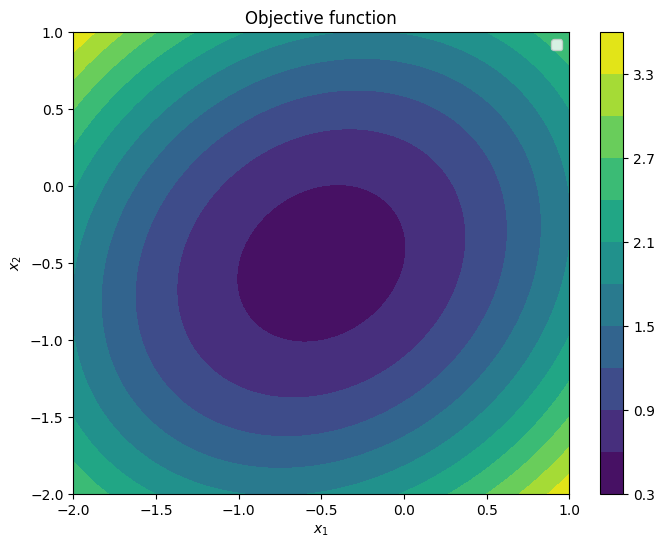

In [7]:
# question 2

x1s = np.linspace(-2, 1, 100)
x2s = np.linspace(-2, 1, 100)
X1, X2 = np.meshgrid(x1s, x2s)
Z = objective(X1, X2)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, Z, levels=10)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Objective function")
plt.colorbar(contour)
plt.legend()
plt.show()

In [10]:
# question 3

def gradf(x1,x2):
  dx1 = np.exp(x1)/(np.exp(x1)+np.exp(x2)) + x1
  dx2 = np.exp(x2)/(np.exp(x1)+np.exp(x2)) + x2
  return np.array([dx1,dx2])

print(gradf(0,0))

def hessianf(x1,x2):
  factor = 1/(np.exp(x1)+np.exp(x2))**2
  y11 = np.exp(x1)+np.exp(x2)+np.exp(2*x2)+2*np.exp(x1+x2)
  y12 = -np.exp(x1+x2)
  y21 = y12
  y22 = np.exp(x1)+np.exp(x2)+np.exp(2*x1)+2*np.exp(x1+x2)
  return np.array([[y11,y12],[y21,y22]])

print(hessianf(0,0))

[0.5 0.5]
[[ 5. -1.]
 [-1.  5.]]


In [12]:
# question 4

print(gradf(-0.5,-0.5))

# We know that the objective function is convex, thus when a stationary point exists, it is solution of the problem


[0. 0.]


In [55]:
# question 5.1

# Initial point
x1 = np.random(-2,-1)
x2 = np.random(-2,-1)
x0 = np.array([x1, x2])
print(x0) # Erreur de module que je ne comprends pas

# Stopping criterion : K < max_iter & |f(x_k)-f(x_(k+1))| < eps
max_iter = 25
eps = 0.001

# Fixed step-size
alpha_fixed = 1
xs = [x0.copy()]  # iterative values
cv = [0,objective(x1,x2)]  # cost values

for i in range (max_iter):
  while abs(cv[-1]-cv[-2]) > eps:
    x1 = xs[-1][0]
    x2 = xs[-1][1]
    grad = gradf(x1,x2)
    x = xs[-1] - alpha_fixed * grad
    y = objective(x[0],x[1])
    xs.append(x)
    cv.append(y)

cv = cv[1:]
print(xs)
print(cv)


TypeError: 'module' object is not callable

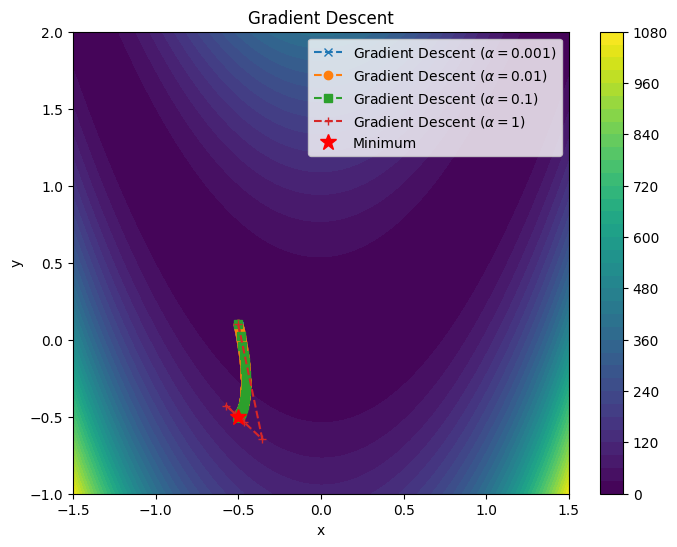

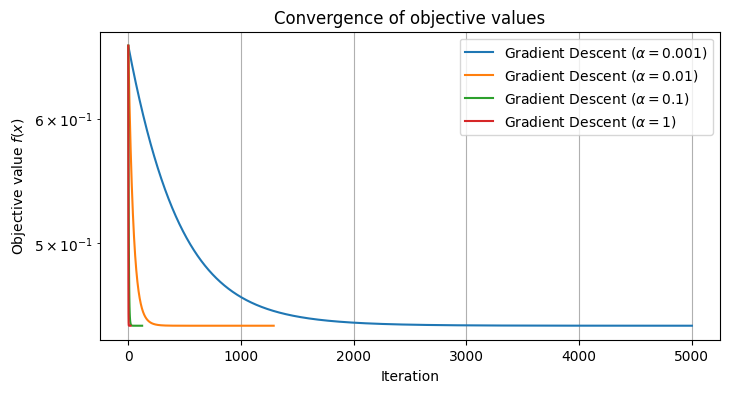

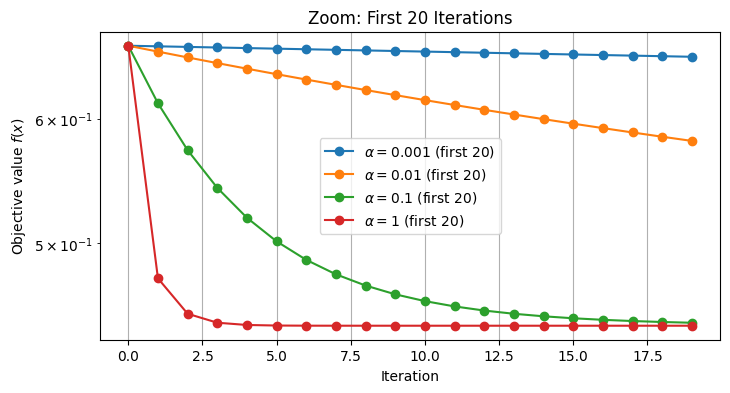

In [45]:
# question 5.2

# Gradient Descent
def gradient_descent(x0, alpha, max_iter=5000):
    x = x0.copy()
    xs = [x.copy()]
    for _ in range(max_iter):
        x -= alpha * gradf(x[0],x[1])
        xs.append(x.copy())
        if np.linalg.norm(gradf(x[0],x[1])) < 1e-6:
            break
    return np.array(xs)

# Run both methods
x0 = np.array([-0.5, 0.1])  # common starting point
gd_path1 = gradient_descent(x0,0.01)
gd_path2 = gradient_descent(x0,0.1)
gd_path3 = gradient_descent(x0,1)
gd_path4 = gradient_descent(x0,0.001)


# Contour plot
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 400), np.linspace(-1, 2, 400))
zz = (1-xx)**2 + 100*(yy-xx**2)**2

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, zz, levels=40, cmap="viridis")
plt.plot(gd_path4[:,0], gd_path4[:,1], 'x--', label="Gradient Descent ($\\alpha=0.001$)")
plt.plot(gd_path1[:,0], gd_path1[:,1], 'o--', label="Gradient Descent ($\\alpha=0.01$)")
plt.plot(gd_path2[:,0], gd_path2[:,1], 's--', label="Gradient Descent ($\\alpha=0.1$)")
plt.plot(gd_path3[:,0], gd_path3[:,1], '+--', label="Gradient Descent ($\\alpha=1$)")



plt.plot(-0.5,-0.5, 'r*', markersize=12, label="Minimum")
plt.colorbar()
plt.title("Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Plot convergence in objective values
plt.figure(figsize=(8, 4))
plt.semilogy([objective(x[0],x[1]) for x in gd_path4], label="Gradient Descent ($\\alpha=0.001$)")
plt.semilogy([objective(x[0],x[1]) for x in gd_path1], label="Gradient Descent ($\\alpha=0.01$)")
plt.semilogy([objective(x[0],x[1]) for x in gd_path2], label="Gradient Descent ($\\alpha=0.1$)")
plt.semilogy([objective(x[0],x[1]) for x in gd_path3], label="Gradient Descent ($\\alpha=1$)")
plt.xlabel("Iteration")
plt.ylabel("Objective value $f(x)$")
plt.title("Convergence of objective values")
plt.legend()
plt.grid(True)
plt.show()

# Zoom on the first 20 iterations
plt.figure(figsize=(8, 4))
plt.semilogy(range(20), [objective(x[0],x[1]) for x in gd_path4[:20]], 'o-', label="$\\alpha=0.001$ (first 20)")
plt.semilogy(range(20), [objective(x[0],x[1]) for x in gd_path1[:20]], 'o-', label="$\\alpha=0.01$ (first 20)")
plt.semilogy(range(20), [objective(x[0],x[1]) for x in gd_path2[:20]], 'o-', label="$\\alpha=0.1$ (first 20)")
plt.semilogy(range(20), [objective(x[0],x[1]) for x in gd_path3[:20]], 'o-', label="$\\alpha=1$ (first 20)")
plt.xlabel("Iteration")
plt.ylabel("Objective value $f(x)$")
plt.title("Zoom: First 20 Iterations")
plt.legend()
plt.grid(True)
plt.show()

In [63]:
# question 5.3
alpha_conv = [0.001] #convergence
alpha_div = [100] #divergence
max_iter = 100
eps = 0.001
x0 = np.array([-2,-1])

for _ in range (max_iter):
  while abs(alpha_conv[-1] - alpha_div[-1]) > eps:

    alpha0 = (alpha_div[-1] + alpha_conv[-1])/2
    # print(alpha0)
    x = gradient_descent(x0,alpha0)[-1]

    if abs(x[0]+0.5)<eps and abs(x[1]+0.5)<eps: # Descente convergente ou pas
      alpha_conv.append(alpha0)
    else:
      alpha_div.append(alpha0)

print(alpha_conv[-1])


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

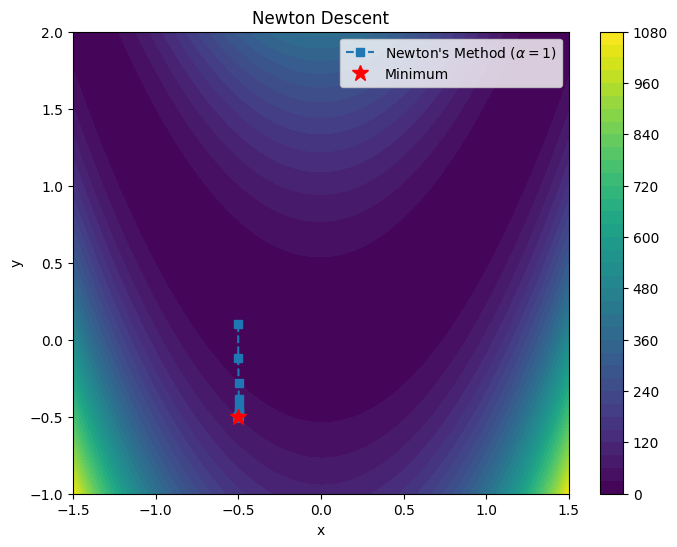

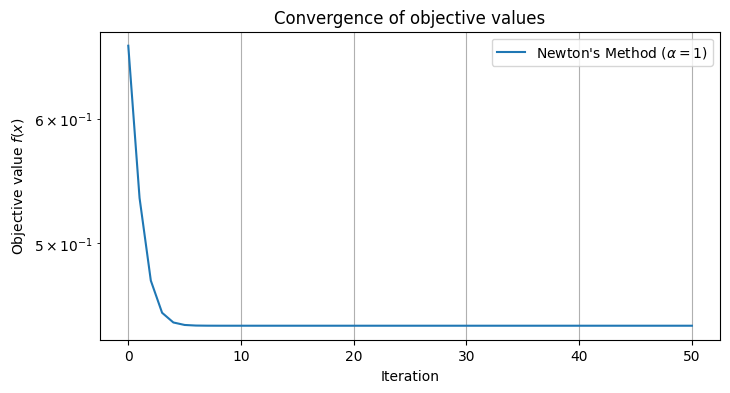

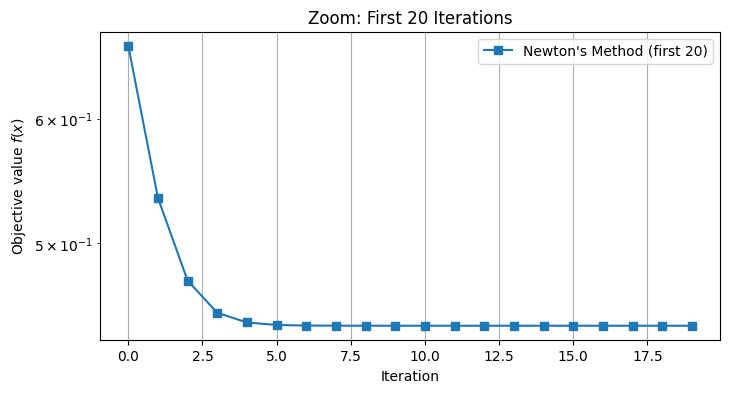

In [36]:
# question 6:

def newton_method(x0, max_iter=50):
    x = x0.copy()
    xs = [x.copy()]
    for _ in range(max_iter):
        g = gradf(x[0],x[1])
        H = hessianf(x[0],x[1])

        p = np.linalg.pinv(H) @ g
        x -=  p
        xs.append(x.copy())
    return np.array(xs)

# Run both methods
x0 = np.array([-0.5, 0.1])  # common starting point
newton_path = newton_method(x0)

# Contour plot
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 400), np.linspace(-1, 2, 400))
zz = (1-xx)**2 + 100*(yy-xx**2)**2

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, zz, levels=40, cmap="viridis")

plt.plot(newton_path[:,0], newton_path[:,1], 's--', label="Newton's Method ($\\alpha=1$)")

plt.plot(-0.5, -0.5, 'r*', markersize=12, label="Minimum")
plt.colorbar()
plt.title("Newton Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Plot convergence in objective values
plt.figure(figsize=(8, 4))
plt.semilogy([objective(x[0],x[1]) for x in newton_path], label="Newton's Method ($\\alpha=1$)")
plt.xlabel("Iteration")
plt.ylabel("Objective value $f(x)$")
plt.title("Convergence of objective values")
plt.legend()
plt.grid(True)
plt.show()

# Zoom on the first 20 iterations
plt.figure(figsize=(8, 4))
plt.semilogy(range(20), [objective(x[0],x[1]) for x in newton_path[:20]], 's-', label="Newton's Method (first 20)")
plt.xlabel("Iteration")
plt.ylabel("Objective value $f(x)$")
plt.title("Zoom: First 20 Iterations")
plt.legend()
plt.grid(True)
plt.show()

# Exercise 2: constrained optimization

Consider the following optimization problem
$$\begin{array}{ll}
   \operatorname{minimize}&\quad -\sum_{i=1}^n k_i \log x_i + \frac{\rho}{2} \Vert x\Vert_2^2\\
    \operatorname{subject\: to} &\quad x \in \mathcal{S}
\end{array}$$
where $k_1, \ldots, k_n > 0$ are known, $\rho \geq 0$ is an hyperparameter, and where $\mathcal{S}$ denotes the \emph{simplex} defined as
$$
\mathcal{S} := \left\lbrace x\in \mathbb{R}^n\mid \sum_{i=1}^n x_i  = 1\text{ and } x_i \geq 0, i=1, \ldots n\right\rbrace$$

We recall that for $\rho = 0$, the unique solution to this problem is given by

$$ x_i^\star = \frac{k_i}{\sum_{i=1}^n k_i}, \quad i=1, \ldots, n$$

The goal of this exercise is to solve the problem numerically when $\rho > 0$.

We provide below the utility function ``proj_simplex`` to project a vector $v\in \mathbb{R}^n$ onto the simplex $\mathcal{S}$, i.e., it solves
$$P_{\mathcal{S}}(v) \in \argmin_{x \in \mathcal{S}} \Vert x - v\Vert_2^2$$

1. Execute the code below and construct a function `costf(x, ks=ks, rho=rho)` that evaluates the objective values. Plot the optimal solution of the problem for $\rho = 0$. Print the corresponding value of the objective.
2. **Projected gradient descent**
    1. Write a function `gradf(x, ks=ks, rho=rho)` that returns the gradient of the objective. Don't forget to define the variable rho outside the function!
    2. Write a function `lipschitz_constant(ks=ks, rho=rho)` that returns the *approximate** lipschitz constant of the problem given by
    $$\lambda_{\max}(\nabla^2 f_0(x)\vert_{x_i = 1/n}) + \rho$$
    i.e., it is the sum of $\rho$ and the largest eigenvalue of the Hessian of $f_0$ evaluated at $x_i = 1/n, i=1, \ldots, n$ when $\rho=0$.

    3. Using the course material, write a function that performs projected gradient descent with constant stepsize $1/L_{\rho}$, where $L_\rho$ is determined by `lipschitz_constant`. The function should incorporate
        - a stopping criterion based on the improvement of the cost function and a maximum number of iterations;
        - the recording of successive iterates ${x}^{(k)}$ and cost values $f_0({x}^{(k)})$;
    4. Verify that the algorithm converges fo  $\rho = 10^4$ and plot the evolution of the objective function. Use $x^{(0)}$ as the solution obtained for $\rho = 0$ as initial point.
    5. Compare solutions $x^\star$ for $\rho = [10^4, 10^5, 10^6]$. What happens in the limit $\rho \to \infty?$.
3. (**Bonus**) Uzawa's method. Considering that inequality constraints are inactive at feasible points, the problem can be simplified as the equality constrained problem
$$\begin{array}{ll}
   \operatorname{minimize}&\quad -\sum_{i=1}^n k_i \log x_i + \frac{\rho}{2} \Vert x\Vert_2^2\\
    \operatorname{subject\: to} &\quad \sum_{i=1}^n x_i = 1
\end{array}$$
with Lagrangian $L(x, \nu) = -\sum_{i=1}^n k_i \log x_i + \frac{\rho}{2} \Vert x\Vert_2^2 + \nu(\sum_{i=1}^n x_i -1)$.
For fixed $\nu$, the Lagrangian is minimized in $x$ by solving the quadratic equation
$$\rho x_i^2 + \nu x_i - k_i = 0, \quad i=1, \ldots, n$$
and selecting $x_i > 0$.

    1.  For fixed $\nu$, write a function `solve_lagrangian_fixed_nu(nu, ks=ks, rho=rho)` that returns $x$ minimizing the Lagrangian. Use `np.roots` to solve the quadratic equation
    2. Implement Uzawa's method (with fixed step size $\alpha = 100$.) and determine $\nu^\star$ for $\rho = [10^4, 10^5, 10^6]$.

In [48]:
#  to be executed before starting the exercise

def get_data_for_ex2():

    np.random.seed(2026)
    counts = np.random.rand(100) # k values

    ks = (np.convolve(counts, np.hanning(9), "same"))
    return ks

def proj_simplex(v, z=1):
    n_features = v.shape[0]
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u) - z
    ind = np.arange(n_features) + 1
    cond = u - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    w = np.maximum(v - theta, 1e-12)
    return w

ks = get_data_for_ex2() # get list of k values k_1 = ks[0], k_2 = ks[1], etc.


In [69]:
# question 1
rho = 0
ks = np.array([1,1])
n = 2

def costf(x,ks=ks,rho=rho):
  sum = 0
  for i in range (len(x)):
    sum += ks[i]*np.log(x[i]) + 0.5*rho*x[i]**2
  return sum

factor = sum(ks[i] for i in range (n))
x_sol = (1/factor)*ks
print(costf(x_sol))

# Appartenance à S

def in_S(x):
  for i in range (len(x)):
    if x[i]<0: return False
  if sum(x[i] for i in range (len(x))) == 1: return True
  return False


-1.3862943611198906


In [ ]:
# question 2.1

def gradf(x,ks=ks,rho=rho):


In [ ]:
# question 2.2

In [ ]:
# question 2.3

In [ ]:
# question 2.4

In [ ]:
# question 2.5

In [ ]:
# question 3.1

In [ ]:
# question 3.2


# Bonus exercise: a large least squares problem

We would like to solve the least squares problem

$$
\begin{array}{ll}
\operatorname{minimize}&\quad \Vert {b} - {A}_i{x}\Vert_2^2\\
\operatorname{subject\: to}&\quad x \in \mathbb{R}^n
\end{array},\qquad i =1, 2$$
for two large matrices ${A}_1$ and ${A}_2$ in $\mathbb{R}^{n\times n}$ with $n=1024$ and the same vector ${b}$.

**Questions**
1. Solve this problem using linear conjugate gradient (CG) applied to the normal equations of the LS problem.
   1. Implement the linear conjugate gradient algorithm by following the [course material](https://jflamant.github.io/mines-nancy-optimization/linear-cg/) (Algorithm 2).
   2. Monitor and display the norm of residual ${r}_k = \Vert {A}{x}^{(k)} -{b}\Vert_2^2$ throughout iterations
   3. display the convergence (in terms of the norm of the residual) for the two matrices. How do you explain the difference?
2. compare the solutions obtained by conjugate gradient with that obtained by the usual least-square explicit solution, in terms of:
   1. residual error
   2. computation time

In [ ]:
# to be executed before starting the exercise

def get_data_for_exo3():
    np.random.seed(2026)
    N = 1024
    b = np.random.randn(N)

    # def of A1, A2
    temp = np.random.randn(N, N)
    u, s, vh = np.linalg.svd(temp)
    d1 = np.diag(1+0.1*np.random.rand(N))
    d2 = np.diag(0.1+1*np.random.rand(N))

    A1 = u @ d1 @ vh
    A2 = u @ d2 @ vh

    return A1, A2, b

A1, A2, b = get_data_for_exo3()

In [ ]:
# question 1

In [ ]:
# question 2